# SVOFilter example

Author: Hannu Parviainen <br>
Last updated: 4.5.2021

The `ldtk.SVOFilter` filter class can be used to create a filter from the [Spanish Virtual Observatory (SVO) Filter Profile Service (FPS)](http://svo2.cab.inta-csic.es/theory/fps/). The class uses `astroquery` to download the data, and so naturally requires an internet connection.

`SVOFilter` takes only a filter name as an argument, which can be either a full SVO FPS filter name such as `SLOAN/SDSS.g` or a name shortcut such as `Kepler`.

In [13]:
import matplotlib.pyplot as plt 
import numpy as np 

%matplotlib widget
from ldtk import SVOFilter, LDPSetCreator
from IPython.display import display, Latex


In [2]:
SVOFilter.shortcuts

{'kepler': 'Kepler/Kepler.k',
 'tess': 'TESS/TESS.Red',
 'sdss_g': 'SLOAN/SDSS.g',
 'sdss_r': 'SLOAN/SDSS.r',
 'sdss_i': 'SLOAN/SDSS.i',
 'sdss_z': 'SLOAN/SDSS.z'}

In [3]:
# Check which filter was used to gather the TASTE data, 
# different datasets may have been gathered with different filters

#Note: to have PyLDTk properly working, you have to install version 1.7 
#pip install ldtk==1.7 --user 
#Run this command from the AstroLab2 environment, but from a terminal and NOT from a Jupyter Notebook


tess_fr = SVOFilter('TESS')
kepler_fr = SVOFilter('Kepler')


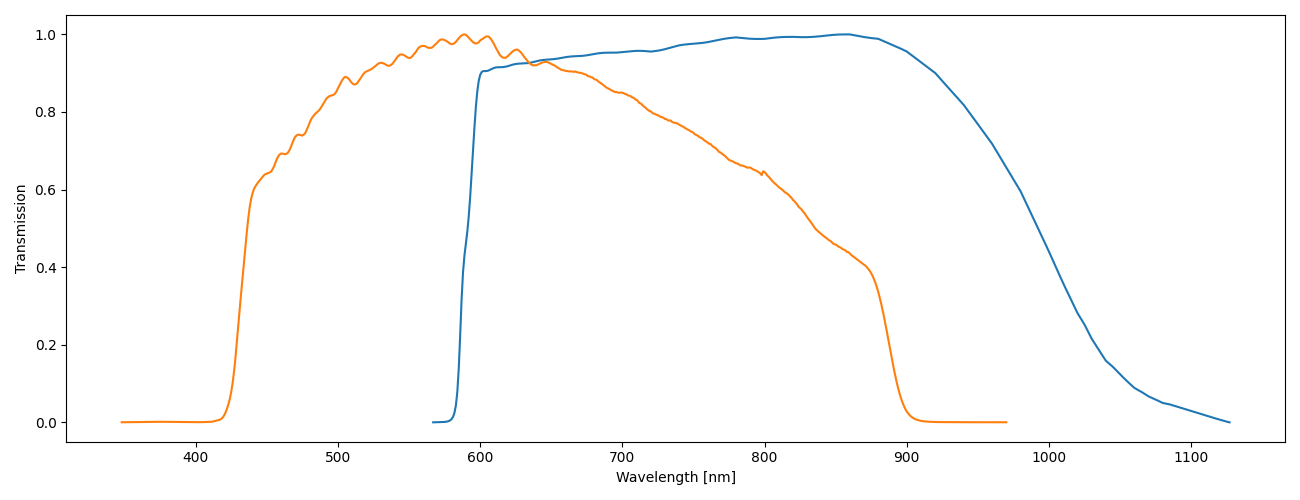

In [7]:
fig, ax = plt.subplots(figsize=(13,5))
tess_fr.plot(ax=ax)
kepler_fr.plot(ax=ax)
fig.tight_layout()


In [8]:
filters = [
    kepler_fr,
    tess_fr]

---

<center>&copy;2021 Hannu Parviainen</center>

In [9]:
sc = LDPSetCreator(teff=(4570,100), logg=(4.60,0.05), z=(0.00,0.10), filters=filters)


Need to download 35 files, approximately 11.69 MB


LDTk downloading uncached files:   0%|          | 0/35 [00:00<?, ?it/s]

In [10]:
ps = sc.create_profiles(nsamples=2000)
ps.resample_linear_z(100)

ps.set_uncertainty_multiplier(10)

qm,qe = ps.coeffs_qd(do_mc=True, n_mc_samples=20000)

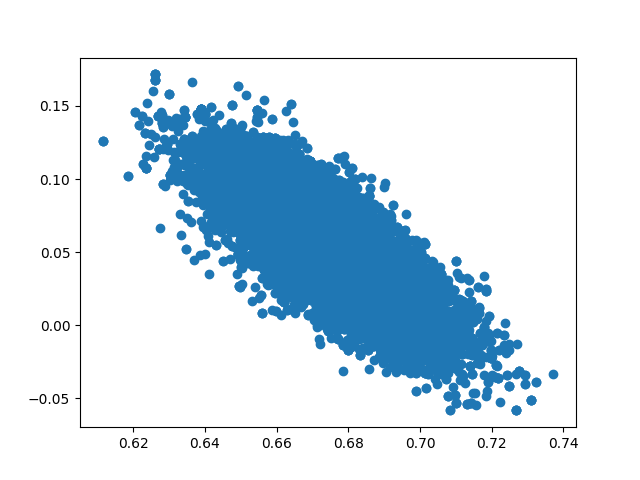

In [14]:
chains = np.array(ps._samples['qd'])
np.shape(chains)

plt.figure()
plt.scatter(chains[0,:,0], chains[0,:,1])
plt.show()

In [15]:
for i, (c, e) in enumerate(zip(qm, qe)):
    display(Latex('u$_{i:d} = {c[0]:5.4f} \pm {e[0]:5.4f}\quad$'
                  'v$_{i:d} = {c[1]:5.4f} \pm {e[1]:5.4f}$'.format(i=i+1,c=c,e=e)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>